# Sales Prediction Dataset

The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product. Here's an explanation of the dataset:

1. TV: This column represents the amount of money spent on advertising the product on television. TV advertising is a traditional and widely used medium for reaching a broad audience.

2. Radio: This column indicates the advertising expenditure on radio. Radio advertising is known for its ability to target specific demographics and local audiences.

3. Newspaper: This column shows the advertising cost spent on newspaper advertising. Newspaper advertising is often used for targeting specific geographic regions or demographics.

4. Sales: This column represents the number of units sold corresponding to the advertising expenditures on TV, Radio, and newspapers.

Questions:

1.	What is the average amount spent on TV advertising in the dataset?

2.	What is the correlation between radio advertising expenditure and product sales?

3.	Which advertising medium has the highest impact on sales based on the dataset?

4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

6.	How does the performance of the linear regression model change when the dataset is normalized?

7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?


1. What is the average amount spent on TV advertising in the dataset?

Average TV advertising spend: $147.04k


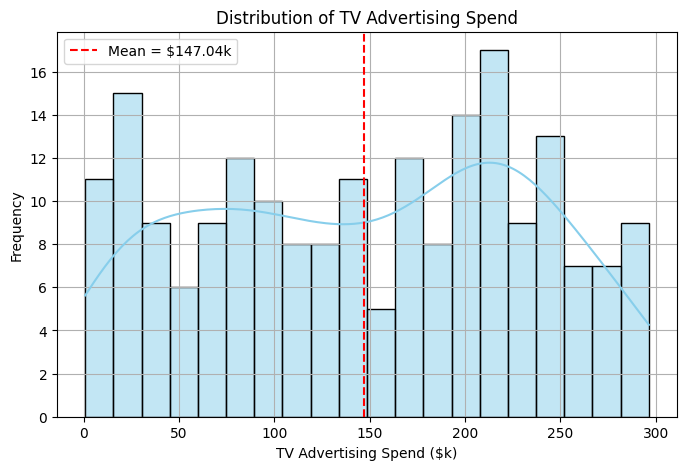

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (skip this if you've already loaded it)
df = pd.read_excel(r"Datasets/advertising_sales_data.xlsx")

# Calculate the average TV advertising spend
average_tv_spend = df['TV'].mean()
print(f"Average TV advertising spend: ${average_tv_spend:.2f}k")

# Optional: Visualize the distribution of TV spend
plt.figure(figsize=(8, 5))
sns.histplot(df['TV'], bins=20, kde=True, color='skyblue')
plt.axvline(average_tv_spend, color='red', linestyle='--', label=f'Mean = ${average_tv_spend:.2f}k')
plt.title('Distribution of TV Advertising Spend')
plt.xlabel('TV Advertising Spend ($k)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


2. What is the correlation between radio advertising expenditure and product sales?

Correlation between Radio advertising and Sales: 0.3497


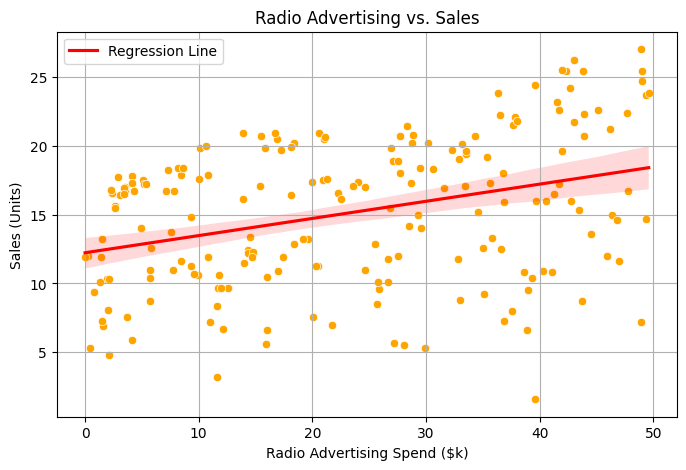

In [2]:
# Calculate the Pearson correlation coefficient between Radio spend and Sales
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"Correlation between Radio advertising and Sales: {correlation_radio_sales:.4f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Radio', y='Sales', data=df, color='orange')
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red', label='Regression Line')
plt.title('Radio Advertising vs. Sales')
plt.xlabel('Radio Advertising Spend ($k)')
plt.ylabel('Sales (Units)')
plt.legend()
plt.grid(True)
plt.show()


3. Which advertising medium has the highest impact on sales based on the dataset?

Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.056648  0.901208
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.056648  0.354987   1.000000  0.157960
Sales      0.901208  0.349728   0.157960  1.000000


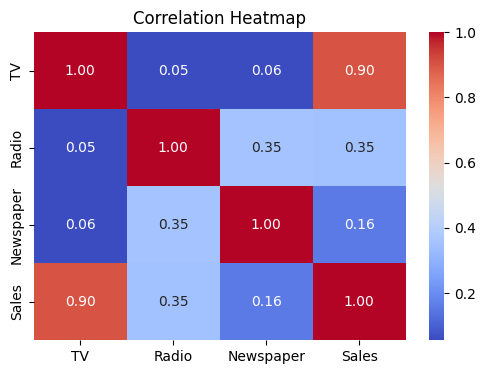


Linear Regression Coefficients:
Radio        0.107018
TV           0.054446
Newspaper    0.000323
dtype: float64


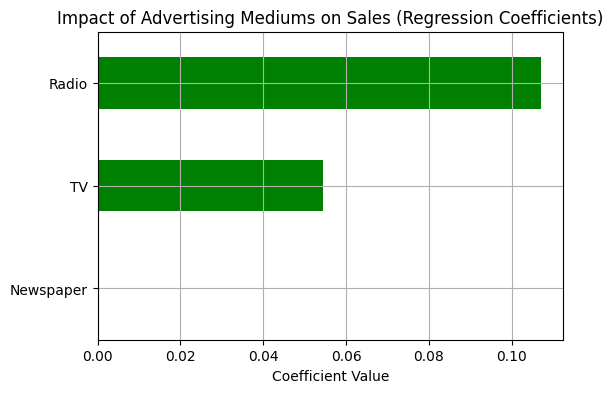

In [6]:
from sklearn.linear_model import LinearRegression

# Step 1: Correlation matrix
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 2: Fit a multiple linear regression model
df.fillna(df.mean(numeric_only=True), inplace=True)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

# Display coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nLinear Regression Coefficients:")
print(coefficients.sort_values(ascending=False))

# Visualize the impact (coefficients)
plt.figure(figsize=(6, 4))
coefficients.sort_values().plot(kind='barh', color='green')
plt.title('Impact of Advertising Mediums on Sales (Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.show()


4. Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

Mean Squared Error (MSE): 2.91
R-squared Score: 0.9059


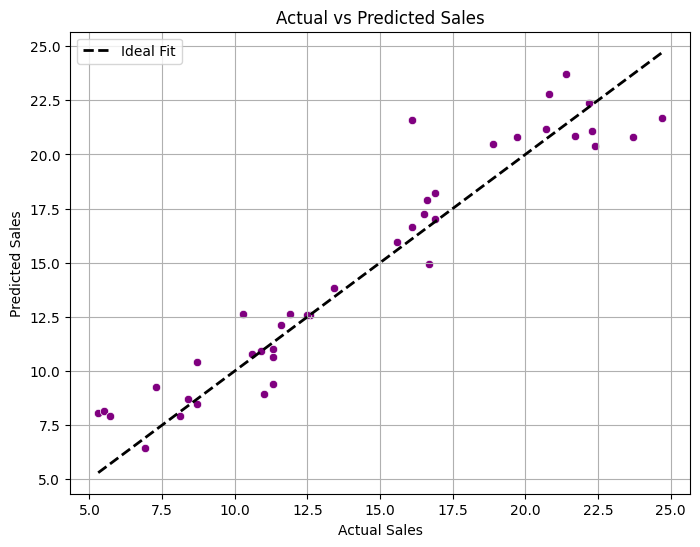

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


5. How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [8]:
# New data point
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [50]
})

# Predict sales using the trained model
predicted_sales = model.predict(new_data)
print(f"Predicted Sales for TV=$200k, Radio=$40k, Newspaper=$50k: {predicted_sales[0]:.2f} units")


Predicted Sales for TV=$200k, Radio=$40k, Newspaper=$50k: 19.87 units


6. How does the performance of the linear regression model change when the dataset is normalized?

In [9]:
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-test split on scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train linear regression on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

# Step 4: Predict and evaluate
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print("After Normalization:")
print(f"Mean Squared Error (MSE): {mse_scaled:.2f}")
print(f"R-squared Score: {r2_scaled:.4f}")


After Normalization:
Mean Squared Error (MSE): 2.91
R-squared Score: 0.9059


7. What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

Model with Radio and Newspaper only:
Mean Squared Error (MSE): 27.50
R-squared Score: 0.1100


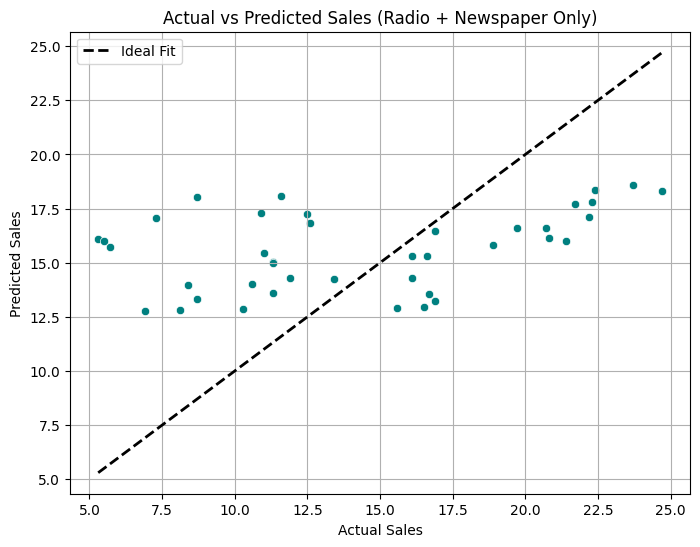

In [10]:
# Step 1: Define features (only Radio and Newspaper) and target
X_rn = df[['Radio', 'Newspaper']]
y = df['Sales']

# Step 2: Train-test split
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)

# Step 4: Predict and evaluate
y_pred_rn = model_rn.predict(X_test_rn)

mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)

print("Model with Radio and Newspaper only:")
print(f"Mean Squared Error (MSE): {mse_rn:.2f}")
print(f"R-squared Score: {r2_rn:.4f}")

# Optional: Compare visually
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_rn, y=y_pred_rn, color='teal')
plt.plot([y_test_rn.min(), y_test_rn.max()], [y_test_rn.min(), y_test_rn.max()],
         color='black', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Radio + Newspaper Only)")
plt.legend()
plt.grid(True)
plt.show()
